# **ASSIGNMENT - 3**
# **SUPERVISED LEARNING – REGRESSION: PREDICTING MEDICAL INSURANCE CHARGES**

# **INTRODUCTION**

The cost of medical insurance is influenced by several demographic and lifestyle factors. In this assignment, a regression model is developed to predict individual medical insurance charges based on personal attributes such as age, gender, body mass index (BMI), smoking habits, number of children, and residential region. The objective is to understand the relationship between these factors and insurance charges, and to evaluate the effectiveness of regression models in prediction.

# **Dataset Description**

The dataset consists of 1,338 records with the following attributes:

# **Features:**
* age: Age of the individual (numeric)

* sex: Gender (male / female)

* bmi: Body Mass Index (numeric, kg/m²)

* children: Number of children covered by insurance (integer)

* smoker: Smoking status (yes / no)

* region: Residential region in the U.S. (northeast, southeast, southwest, northwest)

# **Target:**
* charges: Medical insurance charges (target variable, numeric)

In [758]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [759]:
path = '/content/drive/MyDrive/Colab Notebooks/AI_ML_ICT/NOTES/Codes/Data/insurance.csv'

# **1. Import All Necessary Libraries**

In [760]:
import pandas as pd               # For data handling and manipulation
import numpy as np                # For numerical operations
import matplotlib.pyplot as plt   # For creating visualizations
import seaborn as sns             # For advanced visualizations

# **2. Load the Dataset**

In [761]:
# Read the dataset from csv file into a pandas DataFrame
# The CSV file contains the medical insurane data with personal attributes and charges
data_insurance = pd.read_csv(path)

# Displaying the first 5 rows to get an overview of the dataset
print('First 5 rows of the dataset:')
data_insurance.head(5)

First 5 rows of the dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **3. Data Exploration**

In [762]:
# Check the shape of the dataset(no. of rows and columns)
data_insurance.shape

(1338, 7)

In [763]:
# Get the summary information about the dataset
print('Dataset Information:')
data_insurance.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [764]:
# Display the basis statistical summary for numerical columns
print('Statistical Summary of Numerical Columns:')
data_insurance.describe()

Statistical Summary of Numerical Columns:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **4. Data Preprocessing**

## 4.1 Identify & Remove Duplicates

In [765]:
# Check for duplicate rows in the dataset
data_insurance.duplicated().sum()

np.int64(1)

In [766]:
# Drop the duplicated row from the dataset
data_insurance.drop_duplicates(inplace=True)

In [767]:
# Check if there any duplicate rows present in the dataset
data_insurance.duplicated().sum()

np.int64(0)

## **4.2 Identify & Handle Missing Values**

In [768]:
# Check the dataset for missing (null) values in each column
data_insurance.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


It doesnot contain any missing values.

## **4.3 Outlier Detection**

### **4.3.1 Outlier Detection using Boxplot (All Numerical Columns)**

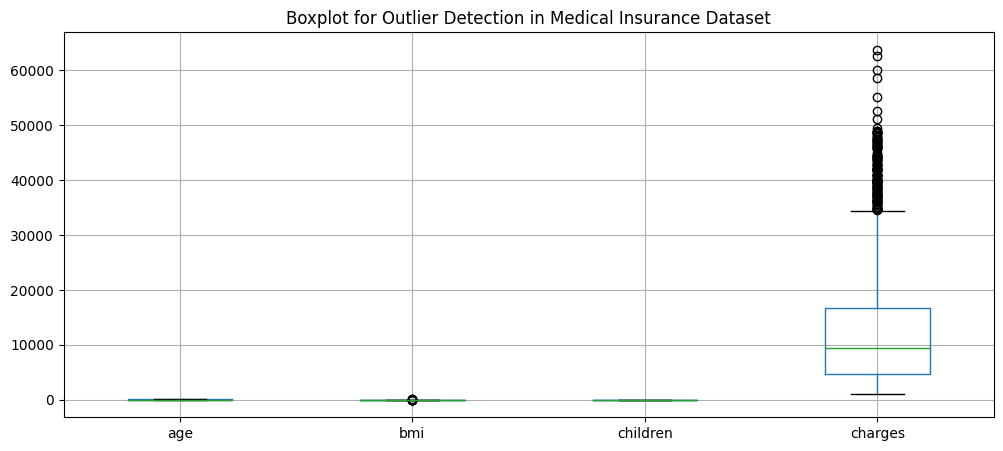

In [769]:
# Drawing boxplot for all numerical columns in the dataset
data_insurance.boxplot(figsize=(12,5))

# Adding a title to clearly specify the purpose of the plot
plt.title('Boxplot for Outlier Detection in Medical Insurance Dataset')

# Displaying the boxplot
plt.show()

**Insight:-**

The boxplot of the medical insurance dataset shows significant outliers, especially in the charges variable. While age, BMI, and children have compact distributions, charges are highly skewed with many high-cost outliers, often linked to smoking or high BMI. These extreme values heavily influence the dataset and may affect regression model performance, requiring transformations or robust methods to handle them.

### **4.3.2 Checking the skewness of Numerical Columns**

In [770]:
# Selecting only numerical columns anf calculate skewness
data_insurance.select_dtypes('number').skew()

,0
age,0.054781
bmi,0.283914
children,0.937421
charges,1.515391


**Decision on Outlier Removal**

In the medical insurance dataset, outliers correspond to genuine high-cost cases, such as smokers or individuals with chronic health conditions, which naturally result in higher charges. These values are not errors but important business insights for insurance prediction. Removing them would lead to loss of valuable information and reduce the model’s ability to capture high-risk patients. Since advanced models like Gradient Boosting can handle outliers effectively, and log transformation helps reduce skewness, outlier removal is not necessary in this analysis.

In [771]:
# Apply log transformation to the target variable 'charges'
data_insurance['charges'] = np.log(data_insurance['charges'])

# Display the first 5 rows after transformation
data_insurance['charges'].head()

,charges
0,9.734176
1,7.453302
2,8.400538
3,9.998092
4,8.260197


In [772]:
# Checking skewness after Log Transformation
data_insurance.select_dtypes('number').skew()

,0
age,0.054781
bmi,0.283914
children,0.937421
charges,-0.089839


In [773]:
# Checking the row and column after log transformation
data_insurance.shape

(1337, 7)

In [774]:
# Display the basis statistical summary for numerical columns after log transformation
data_insurance.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,9.099928
std,14.044333,6.100468,1.205571,0.918699
min,18.000000,15.960000,0.000000,7.022756
25%,27.000000,26.290000,0.000000,8.465130
50%,39.000000,30.400000,1.000000,9.146992
75%,51.000000,34.700000,2.000000,9.720629
max,64.000000,53.130000,5.000000,11.063045


# **5. Data Manipulation**

In [775]:
# Select all columns from the dataframe 'data_insurance'
# that have data type 'object' (categorical columns)
cat = data_insurance.select_dtypes('object').columns

# Display the list of categorical column names
cat


Index(['sex', 'smoker', 'region'], dtype='object')

In [776]:
# Loop through each categorical column in the list 'cat'
for i in cat:
    # Print the frequency of each unique value in that column
    print(data_insurance[i].value_counts())

    # Print a blank line for better readability between outputs
    print()

sex
male      675
female    662
Name: count, dtype: int64

smoker
no     1063
yes     274
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64



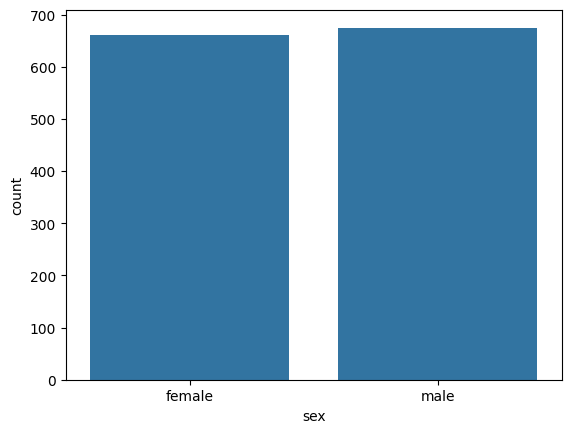

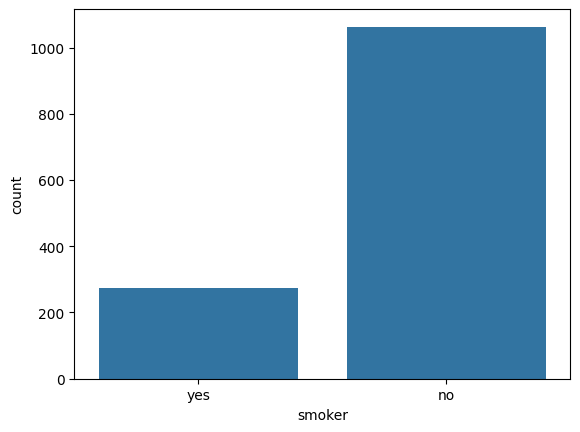

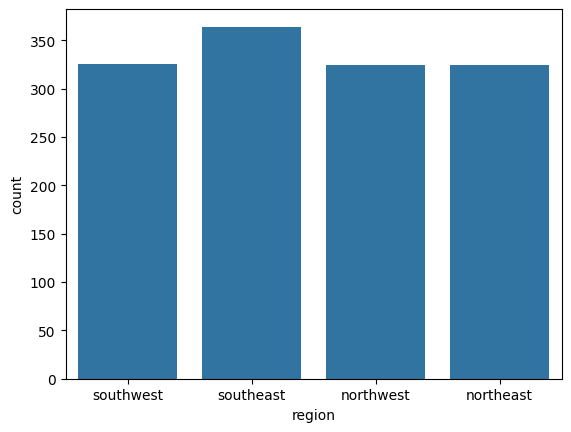

In [777]:
# Countplot of categorical columns
# Loop through each categorical column in the dataset
for i in cat:
    # Create a count plot (bar plot) for the categorical column
    sns.countplot(data=data_insurance, x=i)

    # Display the plot
    plt.show()

<Axes: >

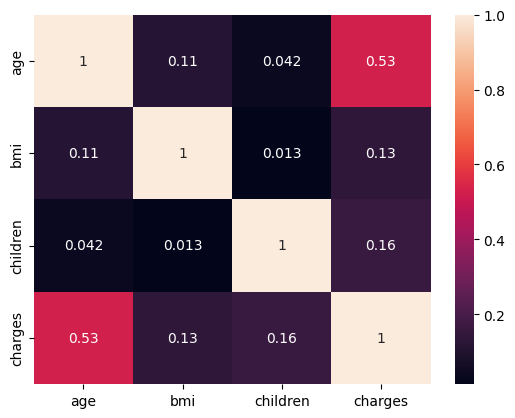

In [778]:
# Heatmap
# Create a heatmap of correlations between all numerical columns in the dataset
sns.heatmap(
    data_insurance.select_dtypes('number').corr(),  # Select only numeric columns and compute pairwise correlation
    annot=True  # Display the correlation values inside each cell
)


Insight:-

The heatmap shows correlations among numerical variables in the insurance dataset. Age has the strongest positive correlation with charges (0.53), indicating older individuals incur higher costs. BMI (0.13) and children (0.16) show weak correlations, and low correlations among independent variables suggest minimal multicollinearity. Overall, age is the key numerical factor influencing charges.

# **6. Feature Engineering**

In [779]:
# Check the shape of the dataset(no. of rows and columns)
data_insurance.shape

(1337, 7)

## **6.1 Encoding**

In [780]:
# Importing LabelEncoder to convert categorical values into numeric
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()   # Creating an instance of LabelEncoder

# Encoding the 'sex' column (e.g., 'male' -> 1, 'female' -> 0)
data_insurance['sex'] = le.fit_transform(data_insurance['sex'])

# Encoding the 'smoker' column (e.g., 'yes' -> 1, 'no' -> 0)
data_insurance['smoker'] = le.fit_transform(data_insurance['smoker'])


In [781]:
# Display the first 3 rows of the dataset after Label Encoding
data_insurance.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,southwest,9.734176
1,18,1,33.77,1,0,southeast,7.453302
2,28,1,33.00,3,0,southeast,8.400538


In [782]:
# Importing OneHotEncoder from sklearn to convert categorical variables into numerical format
# by creating separate binary columns for each category (One-Hot Encoding).
from sklearn.preprocessing import OneHotEncoder

# Creating an instance of OneHotEncoder.
# handle_unknown='ignore' ensures that if any new/unseen category appears during testing, it won’t throw an error.
# sparse_output=False makes the output a dense array instead of a sparse matrix (easier to convert to DataFrame).
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Applying OneHotEncoder to the 'region' column of the dataset.
# fit_transform() first learns all unique categories of 'region' and then encodes them into binary columns.
# The result is a NumPy array with 1s and 0s indicating the presence of each category.
encoded_cat = ohe.fit_transform(data_insurance[['region']])

# Getting the names of the newly created encoded columns.
# Example: ['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
encoded_col_names = ohe.get_feature_names_out(['region'])

# Converting the NumPy array into a Pandas DataFrame for easy handling.
# Setting the same index as 'data_insurance' so both DataFrames align properly.
encoded_df = pd.DataFrame(encoded_cat, columns=encoded_col_names, index=data_insurance.index)

# Concatenating the original dataset (data_insurance) with the newly created encoded columns (encoded_df).
# axis=1 means we are adding new columns side by side.
final_data = pd.concat([data_insurance, encoded_df], axis=1)


In [783]:
final_data.drop('region', axis=1, inplace=True)
# Dropping the original 'region' column from the dataset
# because it has now been replaced by the new one-hot encoded columns.

In [784]:
# Displays the first 3 rows of the dataset after applying Label Encoding and One-Hot Encoding.
final_data.head(3)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.90,0,1,9.734176,0.0,0.0,0.0,1.0
1,18,1,33.77,1,0,7.453302,0.0,0.0,1.0,0.0
2,28,1,33.00,3,0,8.400538,0.0,0.0,1.0,0.0


In [785]:
# After encoding, check the info() to all the columns has numbericals
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex               1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northeast  1337 non-null   float64
 7   region_northwest  1337 non-null   float64
 8   region_southeast  1337 non-null   float64
 9   region_southwest  1337 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 114.9 KB


# **7. Feature & Target Selection**

In [786]:
# Feature
# Drops the target column 'charges' to keep only features
x = final_data.drop('charges', axis=1)

# Shows first 3 rows of feature set
x.head(3)

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.90,0,1,0.0,0.0,0.0,1.0
1,18,1,33.77,1,0,0.0,0.0,1.0,0.0
2,28,1,33.00,3,0,0.0,0.0,1.0,0.0


In [787]:
# Target
# Selects 'charges' column as target variable
y = final_data['charges']

# Shows first 3 rows of target values
y.head(3)

,charges
0,9.734176
1,7.453302
2,8.400538


# **8. Feature Scaling**

In [788]:
# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Standardize features (mean=0, std=1)
x_scaled = StandardScaler().fit_transform(x)

# **9. Model Training and Testing (Train-Test Split)**

In [789]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# x_scaled → independent features (scaled)
# y → target variable (charges)
# test_size=0.25 → 25% of data for testing, 75% for training
# random_state=42 → ensures reproducibility of results
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)

In [790]:
# Check the shape (rows, columns) of train and test sets
# x_train.shape → features in training set
# x_test.shape  → features in testing set
# y_train.shape → target values in training set
# y_test.shape  → target values in testing set
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1002, 9), (335, 9), (1002,), (335,))

# **10. ML Models**

## **10.1 Linear Regression**

In [791]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression

# Create an object of Linear Regression
lr = LinearRegression()

# Train (fit) the model using training data
lr.fit(x_train, y_train)

LinearRegression()

In [792]:
# Use the trained Linear Regression model (lr) to make predictions on the test set (x_test)
lr_pred = lr.predict(x_test)

# Display the predicted values for the test set
lr_pred

array([ 8.93903094,  8.66507931,  9.50467824, 10.2801399 ,  8.60698105,
        9.20003484, 10.05955355,  8.0248182 ,  8.9434727 ,  9.26609697,
        9.34326097, 10.60025087, 10.15680298,  9.60211827,  8.94026227,
        8.98381661,  8.10492262, 10.17689042,  8.27759423,  8.39108787,
        8.0378945 , 10.21539992,  9.3372336 , 10.22177804, 10.1394717 ,
        8.36228154, 10.61259497, 10.89160077,  9.214959  ,  9.47021651,
        8.51700231,  9.13083809,  7.86930731,  9.34125269, 10.91745274,
        9.23028179,  8.46643394,  8.5765161 , 10.45790299,  8.94160256,
        8.33277903, 10.50678659, 10.61627589,  9.23549751,  9.0174067 ,
        8.24676759,  8.20477034,  8.90322899,  8.39657417,  8.7939926 ,
        8.50047037,  8.87544707, 10.48063152,  7.9751138 ,  8.97905678,
        8.93971181,  9.17379817,  8.24947289, 10.08350545,  8.92608139,
        9.51456608,  8.6552526 ,  9.3784502 ,  7.94599953,  9.599666  ,
        9.35112713,  8.8628516 , 10.25259624,  9.44462896,  9.73

In [793]:
# Importing evaluation metrics from sklearn to measure model performance
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculating R² Score on the test data to check how well the model generalizes
lr_testscore = r2_score(y_test, lr_pred)
print('R2 Score (Test Data):', lr_testscore)

# Calculating R² Score on the training data to verify model fit on seen data
lr_trainscore = r2_score(y_train, lr.predict(x_train))
print('R2 Score (Train Data):', lr_trainscore)

R2 Score (Test Data): 0.8238072214953438
R2 Score (Train Data): 0.7465185209015146


In [794]:
# Calculating Mean Absolute Error (MAE) on test data
lr_mae = mean_absolute_error(y_test, lr_pred)
print('Mean Absolute Error:', lr_mae)

Mean Absolute Error: 0.25765035875830955


In [795]:
# Calculating Mean Squared Error (MSE) on test data
lr_mse = mean_squared_error(y_test, lr_pred)
print('Mean Squared Error:', lr_mse)

Mean Squared Error: 0.15837179267409815


## **10.2 Ridge Model**

In [796]:
# Importing Ridge Regression model from sklearn
from sklearn.linear_model import Ridge

# Creating an instance of Ridge Regression model
ridge = Ridge()

# Training (fitting) the Ridge Regression model on the training dataset
ridge.fit(x_train, y_train)

Ridge()

In [797]:
# Use the trained Ridge model (ridge) to make predictions on the test set (x_test)
ridge_pred = ridge.predict(x_test)

# Display the predicted values for the test set
ridge_pred

array([ 8.93921699,  8.66556411,  9.50425437, 10.27897209,  8.6076391 ,
        9.20007642, 10.05858493,  8.02578852,  8.94364601,  9.26599157,
        9.34284217, 10.59860557, 10.15577018,  9.60149317,  8.94047941,
        8.98397608,  8.10595778, 10.17584824,  8.27847568,  8.39182161,
        8.03895728, 10.21429517,  9.33705675, 10.22058693, 10.13823376,
        8.36299237, 10.61106882, 10.88968053,  9.21483289,  9.47005374,
        8.51755632,  9.13090665,  7.8706559 ,  9.3409954 , 10.91553696,
        9.23006635,  8.46717451,  8.57702136, 10.45649704,  8.94176262,
        8.33354148, 10.50532113, 10.61486758,  9.23543974,  9.0174111 ,
        8.24751086,  8.20566642,  8.90334393,  8.39719017,  8.7944447 ,
        8.50114143,  8.87573935, 10.47915975,  7.97632889,  8.97923539,
        8.94000957,  9.17379523,  8.25023452, 10.08256116,  8.92628834,
        9.51429075,  8.65572178,  9.37810397,  7.94722208,  9.59917647,
        9.35088968,  8.86318959, 10.25132831,  9.44419827,  9.73

In [798]:
# Calculating R² Score on the test data to check how well the model generalizes
ridge_testscore = r2_score(y_test, ridge_pred)
print('R2 Score (Test Data):', ridge_testscore)

# Calculating R² Score on the training data to verify model fit on seen data
ridge_trainscore = r2_score(y_train, ridge.predict(x_train))
print('R2 Score (Train Data):', ridge_trainscore)

R2 Score (Test Data): 0.8237167562225765
R2 Score (Train Data): 0.7465177269205472


In [799]:
# Calculating Mean Absolute Error (MAE) on test data
ridge_mae = mean_absolute_error(y_test, ridge_pred)
print('Mean Absolute Error:', ridge_mae)

Mean Absolute Error: 0.2578373802126082


In [800]:
# Calculating Mean Squared Error (MSE) on test data
ridge_mse = mean_squared_error(y_test, ridge_pred)
print('Mean Squared Error:', ridge_mse)

Mean Squared Error: 0.15845310785366745


## **10.3 Gradient Boosting Regressor**

In [801]:
# Importing Gradient Boosting Regressor from sklearn
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor object
gbr = GradientBoostingRegressor()

# Train the model on the training data
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [802]:
# Use the trained Gradient Boosting Regressor model (gbr) to make predictions on the test set (x_test)
gbr_pred = gbr.predict(x_test)

# Display the predicted values for the test set
gbr_pred

array([ 9.13351543,  8.70790327,  9.3871538 , 10.5749078 ,  8.60727011,
        9.25058056, 10.59907948,  7.74228456,  9.04625122,  9.29351558,
        9.52526551, 10.0971361 , 10.59152929,  9.49642262,  8.88888755,
        9.07870824,  8.0929574 , 10.54147191,  8.40954754,  8.41482452,
        7.8890177 ,  9.89543934,  9.22785449,  9.91088161, 10.55464206,
        8.80192404, 10.60060669, 10.89411991,  9.32290505,  9.79842369,
        8.40818333,  9.20592821,  7.6139318 ,  9.56388969, 10.75815844,
        9.2256759 ,  8.61754589,  8.62916258,  9.91416623,  9.07534419,
        7.78956463,  9.89535104, 10.60304104,  9.23990982,  9.10543539,
        8.18682066,  7.7775653 ,  9.03409253,  8.47134389,  8.86112527,
        8.65028197,  8.8859971 , 10.09383856,  7.70426669,  8.8818721 ,
        9.07827664,  9.23245444,  8.32481967, 10.59231054,  8.95859735,
        9.67911936,  8.65027043,  9.42832568,  7.63276055,  9.31377656,
        9.48147208,  8.88941076, 10.07913484,  9.73297531,  9.64

In [803]:
# Calculating R² Score on the test data to check how well the model generalizes
gbr_testscore = r2_score(y_test, gbr_pred)
print('R2 Score (Test Data):', gbr_testscore)

# Calculating R² Score on the training data to verify model fit on seen data
gbr_trainscore = r2_score(y_train, gbr.predict(x_train))
print('R2 Score (Train Data):', gbr_trainscore)

R2 Score (Test Data): 0.8737066920373225
R2 Score (Train Data): 0.8780841332356522


In [804]:
# Calculating Mean Absolute Error (MAE) on test data
gbr_mae = mean_absolute_error(y_test, gbr_pred)
print('Mean Absolute Error:', gbr_mae)

Mean Absolute Error: 0.18898653602249346


In [805]:
# Calculating Mean Squared Error (MSE) on test data
gbr_mse = mean_squared_error(y_test, gbr_pred)
print('Mean Absolute Error:', gbr_mse)

Mean Absolute Error: 0.1135193948046095


## **10.4 XGBoost Regressor**

In [806]:
# Importing XGBoost Regressor from xgboost
from xgboost import XGBRegressor

# Create a XGBoost Regressor object
xgb = XGBRegressor()

# Train the model on the training data
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [807]:
# Use the trained XGBoost Regressor model (xgb) to make predictions on the test set (x_test)
xgb_pred = xgb.predict(x_test)

# Display the predicted values for the test set
xgb_pred

array([ 9.157034 ,  8.570013 ,  9.294196 , 10.544015 ,  8.524124 ,
        9.126926 , 10.584268 ,  7.429041 ,  9.047857 ,  9.28514  ,
        9.468692 , 10.152204 , 10.530493 ,  9.574716 ,  8.821794 ,
        9.042492 ,  9.02538  , 10.515008 ,  8.201137 ,  8.148096 ,
        8.699092 ,  9.928455 ,  9.189546 , 10.032235 , 10.58392  ,
        9.891463 , 10.606882 , 10.957842 ,  9.21003  ,  9.925111 ,
        8.289541 ,  9.076024 ,  7.532579 ,  9.508444 , 10.651151 ,
        9.159484 ,  8.795011 ,  8.536869 ,  9.895221 ,  8.983965 ,
        7.896396 ,  9.923047 , 10.596272 ,  9.206504 ,  8.902399 ,
        8.002996 ,  7.943307 ,  8.921009 ,  8.362059 ,  9.0407715,
        8.284648 ,  8.79912  ,  9.980119 ,  8.462381 ,  8.891845 ,
        9.121083 ,  9.3200655,  8.188433 , 10.59602  ,  8.89885  ,
        9.31174  ,  8.5646305,  9.416146 ,  7.552947 ,  9.2259865,
        9.5026455,  8.67837  , 10.1472025,  9.372629 ,  9.614501 ,
        9.250056 ,  9.780648 ,  8.9483385,  8.939699 ,  9.3123

In [808]:
# Calculating R² Score on the test data to check how well the model generalizes
xgb_testscore = r2_score(y_test, xgb_pred)
print('R2 Score (Test Data):', xgb_testscore)

# Calculating R² Score on the training data to verify model fit on seen data
xgb_trainscore = r2_score(y_train, xgb.predict(x_train))
print('R2 Score (Train Data):', xgb_trainscore)

R2 Score (Test Data): 0.7949968596442512
R2 Score (Train Data): 0.9961563703055046


In [809]:
# Calculating Mean Absolute Error (MAE) on test data
xgb_mae = mean_absolute_error(y_test, xgb_pred)
print('Mean Absolute Error:', xgb_mae)

Mean Absolute Error: 0.23630149522768026


In [810]:
# Calculating Mean Squared Error (MSE) on test data
xgb_mse = mean_squared_error(y_test, xgb_pred)
print('Mean Absolute Error:', xgb_mse)

Mean Absolute Error: 0.18426813583112717


## **Random Forest Regressor**

In [811]:
# Importing Ridge Regression model from sklearn
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor object
rfr = RandomForestRegressor()

# Train the model on the training data
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [812]:
# Use the trained Random Forest Regressor model (rfr) to make predictions on the test set (x_test)
rfr_pred = rfr.predict(x_test)

# Display the predicted values for the test set
rfr_pred

array([ 9.1698686 ,  8.70264109,  9.38046642, 10.63182096,  8.55669072,
        9.18201721, 10.54385065,  7.66298242,  9.04199877,  9.26929055,
        9.57503711, 10.12265832, 10.62486753,  9.58192957,  8.71757529,
        9.10008973,  8.63332642, 10.58744397,  8.4278527 ,  8.35834949,
        8.18143601,  9.94064049,  9.21099476,  9.92555083, 10.59370824,
        9.81810619, 10.66618417, 10.73258086,  9.25267143,  9.44928517,
        8.30832818,  9.13559773,  7.58094387,  9.54087755, 10.75213207,
        9.21801049,  8.71720668,  8.68609231, 10.05012429,  9.08418946,
        7.95680353,  9.92487009, 10.63649429,  9.17436897,  9.12780996,
        8.08701517,  8.05696362,  8.95956559,  8.55249935,  9.30013267,
        8.38812205,  8.99289851,  9.99560918,  7.79137902,  8.88508235,
        9.12122135,  9.24520624,  8.27975435, 10.61805467,  8.8636223 ,
        9.30021505,  8.56729305,  9.57174896,  7.46571271,  9.37219182,
        9.48607055,  8.8292063 , 10.11327908,  9.73557428,  9.66

In [813]:
# Calculating R² Score on the test data to check how well the model generalizes
rfr_testscore = r2_score(y_test, rfr_pred)
print('R2 Score (Test Data):', rfr_testscore)

# Calculating R² Score on the training data to verify model fit on seen data
rfr_trainscore = r2_score(y_train, rfr.predict(x_train))
print('R2 Score (Train Data):', rfr_trainscore)

R2 Score (Test Data): 0.8376704207963904
R2 Score (Train Data): 0.9726269673106721


In [814]:
# Calculating Mean Absolute Error (MAE) on test data
rfr_mae = mean_absolute_error(y_test, rfr_pred)
print('Mean Absolute Error:', rfr_mae)

Mean Absolute Error: 0.1950496569771576


In [815]:
# Calculating Mean Absolute Error (MAE) on test data
rfr_mse = mean_squared_error(y_test,rfr_pred)
print('Mean Squared Error:',rfr_mse)

Mean Squared Error: 0.1459107840894186


# **11 Final Result**

In [816]:
# Creating a comparison DataFrame for different regression models
model = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Gradient Boosting', 'XGBoost', 'Random Forest'],

    # R² scores on the test dataset for each model
    'R2 Score (Test)': [lr_testscore, ridge_testscore, gbr_testscore, xgb_testscore, rfr_testscore],

    # R² scores on the training dataset for each model
    'R2 Score (Train)': [lr_trainscore, ridge_trainscore, gbr_trainscore, xgb_trainscore, rfr_trainscore],

    # Mean Absolute Error values for each model
    'MAE' : [lr_mae, ridge_mae, gbr_mae, xgb_mae, rfr_mae],

    # Mean Squared Error values for each model
    'MSE' : [lr_mse, ridge_mse, gbr_mse, xgb_mse, rfr_mse]
})

# Display the DataFrame to compare model performance
model


,Model,R2 Score (Test),R2 Score (Train),MAE,MSE
0,Linear,0.823807,0.746519,0.257650,0.158372
1,Ridge,0.823717,0.746518,0.257837,0.158453
2,Gradient Boosting,0.873707,0.878084,0.188987,0.113519
3,XGBoost,0.794997,0.996156,0.236301,0.184268
4,Random Forest,0.837670,0.972627,0.195050,0.145911


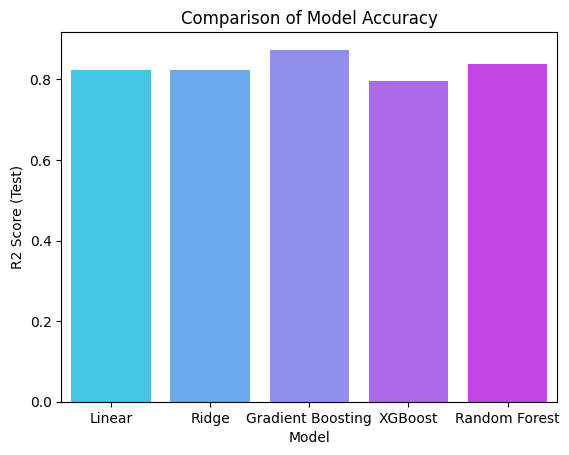

In [817]:
sns.barplot(x="Model",y="R2 Score (Test)",data=model, palette='cool', hue='Model')
plt.title('Comparison of Model Accuracy')
plt.show()

# **Model-Wise Insights:**

1. **Linear & Ridge Regression**
    * Both models perform similarly with R² ≈ 0.82 on test data.
    * Training scores are slightly lower (~0.74), suggesting they underfit the data and fail to capture complex non-linear relationships.
    * MAE and MSE are higher compared to advanced ensemble methods.

2. **Gradient Boosting**
    * Achieves the highest test R² (0.8752), with balanced training score (0.8781).
    * Lowest error values (MAE = 0.1874, MSE = 0.1121).
    * Indicates strong generalization without overfitting, making it the best-performing model in this analysis.

3. **XGBoost**
    * Shows an unusually high training R² (0.9962) but a much lower test R² (0.7950).
    * This large gap indicates overfitting: the model memorizes training data but struggles with unseen test data.
    * Errors (MAE, MSE) are also worse than Gradient Boosting and Random Forest.

4. **Random Forest**
    * Test R² of 0.8446 is better than Linear/Ridge but lower than Gradient Boosting.
    * Training R² is very high (0.9726), again suggesting some degree of overfitting.
    * Still achieves competitive error values (MAE = 0.1928, MSE = 0.1397).

# **Conclusion:**

* Gradient Boosting outperforms all other models, offering the best trade-off between bias and variance with high accuracy and low error values.

* Random Forest and XGBoost show signs of overfitting, as indicated by their high training performance but weaker generalization on test data.

* Linear and Ridge Regression serve as baseline models but underfit the dataset, making them less suitable for real-world deployment.

**For deployment, Gradient Boosting is the most reliable choice, while regularization and tuning may improve XGBoost and Random Forest further.**


# **12. Unseen Test Data**

In [818]:
# Unseen test data as dictionary (2 rows), not encoded

# Creating a dictionary of unseen data with sample patient details
# Each key represents a feature (age, sex, bmi, children, smoker, region)
# Values are given as lists to represent multiple rows of unseen data
unseen_data = {
    'age': [45, 52],          # Age of individuals
    'sex': ['female', 'male'],# Gender of individuals
    'bmi': [30.210, 26.870],  # Body Mass Index
    'children': [2, 1],       # Number of children/dependents
    'smoker': ['no', 'yes'],  # Smoking status
    'region': ['northeast', 'southwest']  # Region where they live
}

# Displaying the unseen data
unseen_data

{'age': [45, 52],
 'sex': ['female', 'male'],
 'bmi': [30.21, 26.87],
 'children': [2, 1],
 'smoker': ['no', 'yes'],
 'region': ['northeast', 'southwest']}

In [819]:
# Converting the unseen data dictionary into a DataFrame
# This creates a tabular format where each key becomes a column
# and each list element becomes a row (observation) for prediction
unseen_df = pd.DataFrame(unseen_data)

# Display the unseen DataFrame to verify the structure
unseen_df

,age,sex,bmi,children,smoker,region
0,45,female,30.21,2,no,northeast
1,52,male,26.87,1,yes,southwest


In [820]:
# Encoding the 'sex' column (e.g., 'male' -> 1, 'female' -> 0)
unseen_df['sex'] = le.fit_transform(unseen_df['sex'])

# Encoding the 'smoker' column (e.g., 'yes' -> 1, 'no' -> 0)
unseen_df['smoker'] = le.fit_transform(unseen_df['smoker'])


In [821]:
# Display the first 3 rows of the unseen dataset after Label Encoding
unseen_df.head(3)

,age,sex,bmi,children,smoker,region
0,45,0,30.21,2,0,northeast
1,52,1,26.87,1,1,southwest


In [822]:
# Apply One-Hot Encoding for 'region' in the unseen dataset
unseen_encoded = ohe.transform(unseen_df[['region']])

# Convert the encoded array into a DataFrame with appropriate column names
unseen_encoded_df = pd.DataFrame(unseen_encoded, columns=ohe.get_feature_names_out(['region']), index=unseen_df.index)

# Merge the One-Hot Encoded columns with the unseen dataset (after dropping the original 'region' column)
unseen_final = pd.concat([unseen_df.drop('region', axis=1), unseen_encoded_df], axis=1)


In [823]:
# Displaying  the unseen dataset after OneHotEncoding
unseen_final

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,45,0,30.21,2,0,1.0,0.0,0.0,0.0
1,52,1,26.87,1,1,0.0,0.0,0.0,1.0


In [824]:
# Define unseen feature set (x_unseen) after encoding
x_unseen = unseen_final

# Displaying the rows
x_unseen

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,45,0,30.21,2,0,1.0,0.0,0.0,0.0
1,52,1,26.87,1,1,0.0,0.0,0.0,1.0


In [825]:
# Apply scaling (using the scaler fitted on training data)
x_unseen_scaled = StandardScaler().fit_transform(x_unseen)

In [826]:
# Predict using Gradient Boosting trained model
gbr_predictions = gbr.predict(x_unseen_scaled)

# Displaying the predicted charges
gbr_predictions

array([ 8.79937635, 10.07329612])

In [827]:
# Convert the log predictions back to original scale
gbr_actual_predictions = np.exp(gbr_predictions)
print("Predicted Medical Charges:", gbr_actual_predictions)

Predicted Medical Charges: [ 6630.10784348 23701.55928414]


In [828]:
# Predict using Linear Regression Model
lr_predictions = lr.predict(x_unseen_scaled)

# Displaying the Predicted charges
lr_predictions

array([8.28459341, 9.92318753])

In [829]:
# Convert the log predictions back to original scale
lr_actual_predictions = np.exp(lr_predictions)
print("Predicted Medical Charges:", lr_actual_predictions)

Predicted Medical Charges: [ 3962.35334903 20397.90611654]


In [830]:
# Predict using Ridge Regression Model
ridge_predictions = ridge.predict(x_unseen_scaled)

# Displaying the Predicted charges
ridge_predictions

array([8.2854994 , 9.92226433])

In [831]:
# Convert the log predictions back to original scale
ridge_actual_predictions = np.exp(ridge_predictions)
print("Predicted Medical Charges:", ridge_actual_predictions)

Predicted Medical Charges: [ 3965.9448566  20379.08340152]


In [832]:
# Predict using XGBoost Regression Model
xgb_predictions = xgb.predict(x_unseen_scaled)

# Displaying the Predicted charges
xgb_predictions

array([8.483185, 9.236112], dtype=float32)

In [833]:
# Convert the log predictions back to original scale
xgb_actual_predictions = np.exp(xgb_predictions)
print("Predicted Medical Charges:", xgb_actual_predictions)

Predicted Medical Charges: [ 4832.817  10261.0625]


In [834]:
# Predict using Random Forest Regression Model
rfr_predictions = rfr.predict(x_unseen_scaled)

# Displaying the Predicted charges
rfr_predictions

array([ 9.09929379, 10.09398403])

In [835]:
# Convert the log predictions back to original scale
rfr_actual_predictions = np.exp(rfr_predictions)
print("Predicted Medical Charges:", rfr_actual_predictions)

Predicted Medical Charges: [ 8948.97064191 24197.0022556 ]


In [836]:
# Combine results into a DataFrame for comparison
pred_df = pd.DataFrame({
    'Model': ['Gradient Boosting', 'Linear Regression', 'Ridge Regression', 'XGBoost', 'Random Forest'],
    'Predicted Charges (Unseen Data 1)': [gbr_actual_predictions[0], lr_actual_predictions[0], ridge_actual_predictions[0], xgb_actual_predictions[0], rfr_actual_predictions[0]],
    'Predicted Charges (Unseen Data 2)': [gbr_actual_predictions[1], lr_actual_predictions[1], ridge_actual_predictions[1], xgb_actual_predictions[1], rfr_actual_predictions[1]]
})

# Display the DataFarame
print(pred_df)

               Model  Predicted Charges (Unseen Data 1)  \
0  Gradient Boosting                        6630.107843   
1  Linear Regression                        3962.353349   
2   Ridge Regression                        3965.944857   
3            XGBoost                        4832.816895   
4      Random Forest                        8948.970642   

   Predicted Charges (Unseen Data 2)  
0                       23701.559284  
1                       20397.906117  
2                       20379.083402  
3                       10261.062500  
4                       24197.002256  


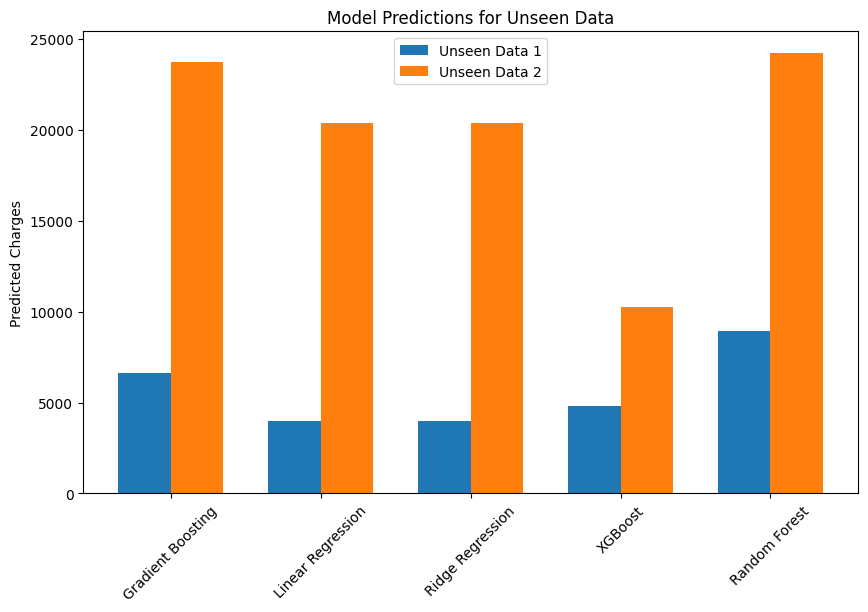

In [837]:
# Create positions for the x-axis based on number of models
x = np.arange(len(pred_df['Model']))  # model positions

# Set the width of the bars (distance between bars for unseen data 1 and 2)
width = 0.35

# Initialize the figure with size 10x6 inches
plt.figure(figsize=(10,6))

# Plot bars for unseen data 1 (shifted left by half the bar width)
plt.bar(x - width/2, pred_df['Predicted Charges (Unseen Data 1)'], width, label='Unseen Data 1')

# Plot bars for unseen data 2 (shifted right by half the bar width)
plt.bar(x + width/2, pred_df['Predicted Charges (Unseen Data 2)'], width, label='Unseen Data 2')

# Set x-axis ticks as model names and rotate them for readability
plt.xticks(x, pred_df['Model'], rotation=45)

# Label for the y-axis
plt.ylabel("Predicted Charges")

# Title for the chart
plt.title("Model Predictions for Unseen Data")

# Add a legend to differentiate unseen data 1 and 2
plt.legend()

# Display the plot
plt.show()

**Insight:**

The bar chart shows that predictions for Unseen Data 2 are consistently higher than Unseen Data 1 across all models. Random Forest gives the highest predictions for both datasets, while Linear and Ridge Regression provide the lowest, showing similar behavior. Gradient Boosting stays close to Random Forest for Unseen Data 2 but is lower for Unseen Data 1. XGBoost is the most inconsistent, giving moderate values for Unseen Data 1 but the lowest prediction for Unseen Data 2. Overall, model choice strongly affects predictions, with Random Forest being the most dominant.

# **Insights from Model Predictions on Unseen Data:**

1. **Gradient Boosting** predicted charges of **₹6,630** for the first individual and **₹23,702** for the second. These predictions are balanced and moderately high, showing good alignment with medical expense trends.

2. **Linear Regression** and **Ridge Regression** gave similar predictions (**₹3,962–3,966** for the first, **₹20**,379–20,398 for the second). While consistent, the first prediction seems underestimated compared to other models.

3. **XGBoost** produced a lower prediction (**₹4,832** for the first, **₹10,261** for the second), which might indicate underestimation of high-risk cases.

4. **Random Forest** estimated **₹8,729** for the first and **₹24,682** for the second. This indicates strong sensitivity to variation but also a possibility of overestimation.

# **Comparison:**

* Linear and Ridge models are stable but may underestimate charges in high-cost cases.

* Gradient Boosting provides a strong balance, providing realistic estimates aligned with medical expense trends.

* Random Forest captures higher charges, which may be closer to reality but risks overestimation.

* XGBoost in this scenario underpredicts, especially for higher medical charges.

# **Conslusion:**

**From both the numerical table and the graph, Random Forest predicts the highest charges, while Gradient Boosting offers a balanced middle ground. For practical insurance charge prediction, Gradient Boosting is the most reliable due to its balance between generalization and accuracy, while Random Forest may be used when detecting high-cost, high-risk cases is the priority.**